In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets", "housing")
HOUSING_URL=DOWNLOAD_ROOT+ "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [4]:
fetch_housing_data()

Above code was for downloading and fetching the data in csv format

Now loading the data through pandas

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    print(type(pd.read_csv(csv_path)))
    return pd.read_csv(csv_path)

Now taking a quick Look

In [7]:
df=load_housing_data()

<class 'pandas.core.frame.DataFrame'>


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting the data

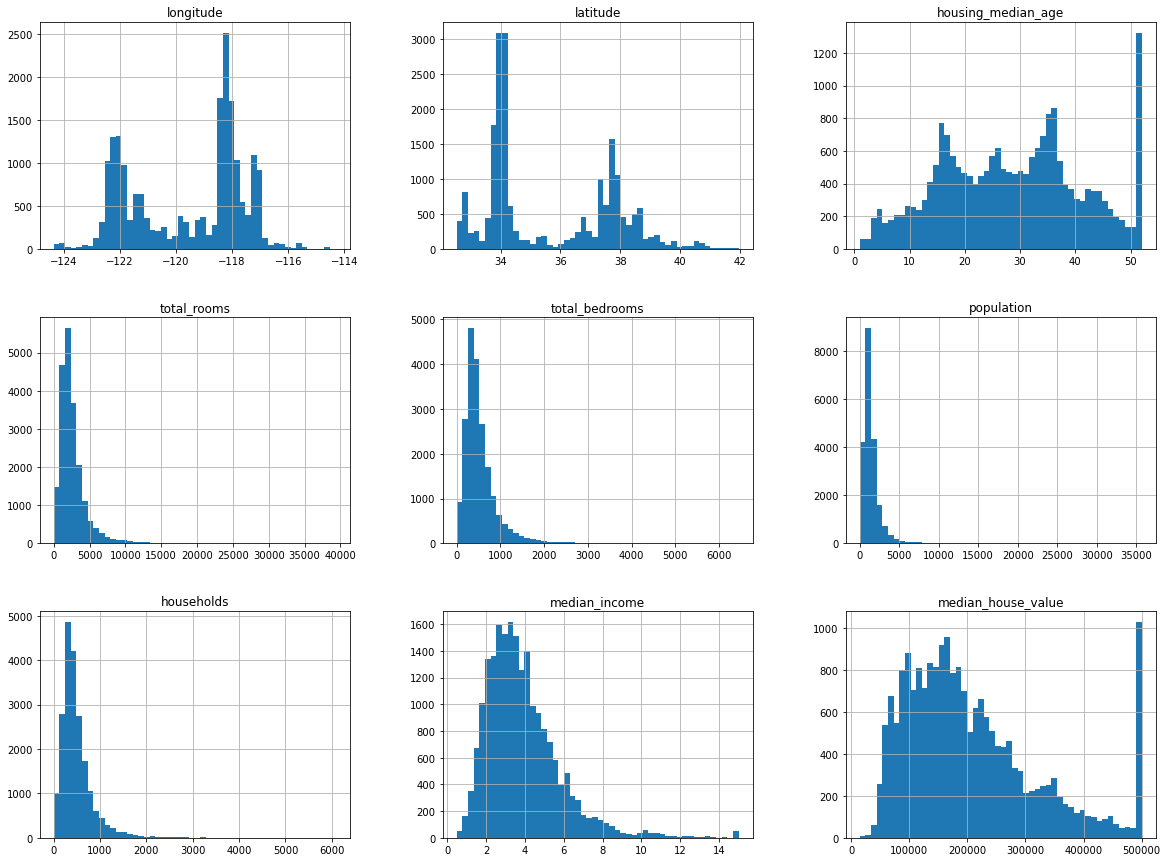

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Creating a test set

In [12]:
import numpy as np

In [16]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
trainSet, testSet=split_train_test(df, 0.2)
len(trainSet)



16512

In [18]:
len(testSet)

4128

## Splitting using sklearn:

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## Using Stratified sampling:

In [23]:
df["income_cat"] = pd.cut(df["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

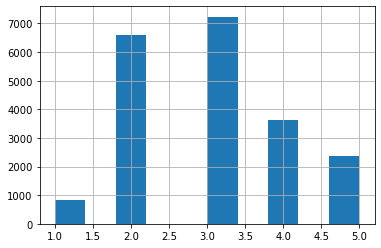

In [24]:
df["income_cat"].hist()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit


In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [31]:
df = strat_train_set.copy()


## Graph Plotting

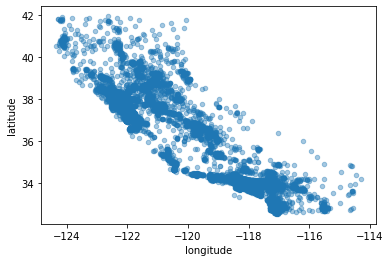

In [36]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

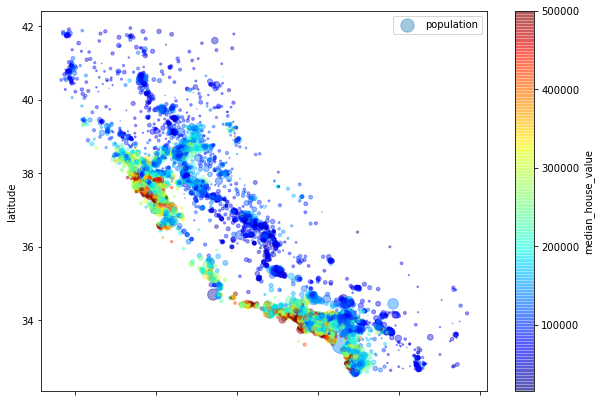

In [38]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
# Above s represents the population and visually represented as the radius of the circle.
# and c represents the price value.

## Correlation

In [39]:
corr_matrix = df.corr()

In [40]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166A755A580>,
      dtype=object)

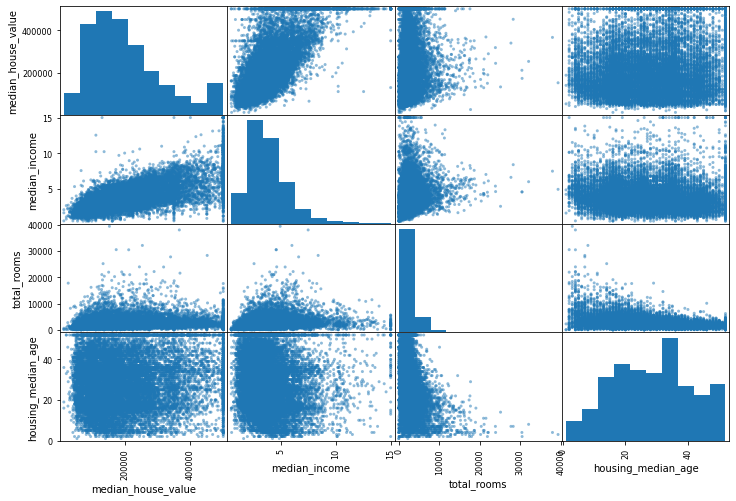

In [41]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

## Data Combination

In [42]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [44]:
 corr_matrix = df.corr()

In [45]:
 corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

It can be observed that the new bedrooms_per_room is more co-related with median house values

In [46]:
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()


## Data Pre-processing:

In [47]:
# Three options to deal with missing attributes:
# 1. Delete the whole feature
# 2. delete all the datapoints having missing options
# 3. Replace missing values with some value.



In [48]:
#For eg: filling them with median value
median = df["total_bedrooms"].median() 
df["total_bedrooms"].fillna(median, inplace=True)

In [55]:
#Using sklearn to handle missing attributes:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

df_num = df.drop("ocean_proximity", axis=1)
imputer.fit(df_num)   

X = imputer.transform(df_num)   ## This will replace all the missing attributes with the median

df_tr = pd.DataFrame(X, columns=df_num.columns,
index=df_num.index)

#An imputer is an Estimator as well as a Transformer, Predictor == Linear Reg

## Handling Categorical Attributes

In [56]:
df_cat=df[["ocean_proximity"]]
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [61]:
# Using Ordinal Encoder:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [62]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
#Using one-hot encoder:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
# Sparse matrix stores the location of one
df_cat_1hot.toarray()
 

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [70]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transform Pipelines

In [71]:
# Feature scaling : 
#     Min-max Scaling: subtracting the min value and dividing by the max minus the min. Scikit-learn provides MinMaxScaler function for this
#     Standardisation: first it subtracts the mean value (so standardized values always have a zero mean), andthen it divides by the standard deviation so that the resulting distribution has unit variance
#standardization is much less affected by outliers
# Scikit learn : StandardScaler


In [76]:
#Handling only numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),])
df_num_tr = num_pipeline.fit_transform(df_num)

In [77]:
#Handling both categorical and numerical attributes
from sklearn.compose import ColumnTransformer
num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
df_prepared = full_pipeline.fit_transform(df)

## Training:

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)


LinearRegression()

In [83]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 88972. 305338. 153322. 184292. 246850.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [84]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


69050.55278872748

The above case is an example of underfitting

In [86]:
#Using decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)


DecisionTreeRegressor()

In [87]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The above one is the case of overfitting

## Cross-Validation:

In [89]:
# Testing on a Decision Tree regressor:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, df_prepared, df_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [91]:
 display_scores(tree_rmse_scores)

Scores: [71287.22859964 70767.72084507 64280.74395215 69518.88357844
 68251.21864786 68129.75802077 73227.37280032 71027.55877847
 67296.63110803 69960.57455574]
Mean: 69374.76908865155
Standard deviation: 2379.4156811319704


In [93]:
# Testing on a linear regression:
scores = cross_val_score(lin_reg, df_prepared, df_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [72231.68120662 65318.2240289  67639.8929768  69383.09443625
 66774.90825195 72985.5155148  70522.24414582 69440.77896541
 66934.69277123 70768.55044626]
Mean: 69199.95827440287
Standard deviation: 2373.524852221812


In [96]:
# Testing on a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse



0.0

In [98]:
scores = cross_val_score(forest_reg, df_prepared, df_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [50667.72644139 49208.02889422 45818.36694384 50324.7150993
 47631.86419927 49548.05338052 51337.2284173  48946.51739104
 47815.15521856 53011.1628429 ]
Mean: 49430.881882833855
Standard deviation: 1948.7584299380983


## Fine Tune the Model

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [101]:
 grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [102]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [103]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63710.14609645597 {'max_features': 2, 'n_estimators': 3}
55520.63243639377 {'max_features': 2, 'n_estimators': 10}
52403.68278965906 {'max_features': 2, 'n_estimators': 30}
60105.70140915028 {'max_features': 4, 'n_estimators': 3}
52362.30474357755 {'max_features': 4, 'n_estimators': 10}
50501.94074590053 {'max_features': 4, 'n_estimators': 30}
58522.50562935309 {'max_features': 6, 'n_estimators': 3}
52010.87117708989 {'max_features': 6, 'n_estimators': 10}
50041.58083374801 {'max_features': 6, 'n_estimators': 30}
58232.590032673674 {'max_features': 8, 'n_estimators': 3}
52447.134957308495 {'max_features': 8, 'n_estimators': 10}
50097.466740961325 {'max_features': 8, 'n_estimators': 30}
61611.371198983994 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54208.20184090799 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58997.803182222255 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52597.63009953399 {'bootstrap': False, 'max_features': 3, 'n_estimators

## Evaluating on Test set

In [104]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

47139.351986192036

## Saving with Joblib

In [106]:
import joblib
joblib.dump(final_model, "my_model.pkl")

['my_model.pkl']